In [2]:
import torch

In [3]:
data_path = "/data3/sebastian.cavada/datasets/re10k/train/000000.torch"

data = torch.load(data_path)

In [15]:
len(data[4]['images'])  

69

In [25]:
data[0]['images'][2].shape[0]

80518

In [18]:
data[0]

{'url': 'https://www.youtube.com/watch?v=SvqsAPmBkbI',
 'timestamps': tensor([120620500, 120662208, 120703917, 120745625, 120787333, 120829042,
         120870750, 120912458, 120954167, 120995875, 121037583, 121079292,
         121121000, 121162708, 121204417, 121246125, 121287833, 121329542,
         121371250, 121412958, 121454667, 121496375, 121538083, 121579792,
         121621500, 121663208, 121704917, 121746625, 121788333, 121830042,
         121871750, 121913458, 121955167, 121996875, 122038583, 122080292,
         122122000, 122163708, 122205417, 122247125, 122288833, 122330542,
         122372250, 122413958, 122455667, 122497375, 122539083, 122580792,
         122622500, 122664208, 122705917, 122747625, 122789333, 122831042,
         122872750, 122914458, 122956167, 122997875, 123039583, 123081292,
         123123000, 123164708, 123206417, 123248125, 123289833, 123331542,
         123373250, 123414958, 123456667, 123498375]),
 'cameras': tensor([[ 0.5569,  0.9901,  0.5000,  ..

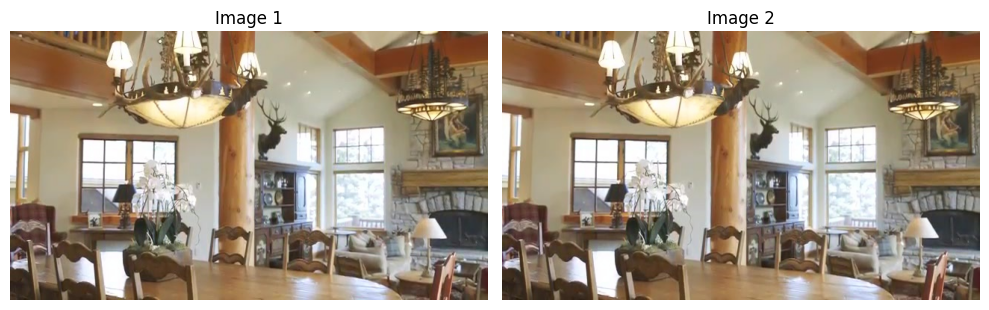

In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io

def tensor_to_image(tensor):
    """
    Converts a PyTorch tensor containing JPEG byte data to a PIL Image.
    
    Args:
        tensor (torch.Tensor): A 1D tensor of type torch.uint8 representing JPEG bytes.
    
    Returns:
        PIL.Image.Image: The decoded image.
    """
    # Ensure the tensor is on CPU and convert to NumPy array
    byte_array = tensor.cpu().numpy().tobytes()
    
    # Use BytesIO to handle the byte data
    image_stream = io.BytesIO(byte_array)
    
    # Open the image using PIL
    try:
        image = Image.open(image_stream)
        # Ensure the image is loaded before closing the stream
        image.load()
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

def display_images(image_list):
    """
    Displays a list of PIL Images using matplotlib.
    
    Args:
        image_list (list of PIL.Image.Image): The images to display.
    """
    num_images = len(image_list)
    if num_images == 0:
        print("No images to display.")
        return
    
    # Determine the grid size for display
    cols = min(3, num_images)
    rows = (num_images + cols - 1) // cols
    
    plt.figure(figsize=(5 * cols, 5 * rows))
    
    for idx, img in enumerate(image_list):
        if img is None:
            continue
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Image {idx + 1}')
    
    plt.tight_layout()
    plt.show()

# Convert all tensors to images
decoded_images = [tensor_to_image(tensor) for tensor in data[0]['images'][0:2]]

# Display the images
display_images(decoded_images)